<font size = "5"> **EELS_Tools:  [Spectroscopy](../4_EELS_Tools.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of EDS Spectra
<br>

[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Spectroscopy/EDS.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Spectroscopy/EDS.ipynb)
    
part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package



Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

## Content
An Introduction into displaying and analyzing EDS spectrum images and spectra
This works also on Google Colab.


## Prerequesites

### Install pyTEMlib

If you have not done so in the [Introduction Notebook](_.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [ ]:
import sys
import importlib.metadata

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2025.11.0':
    print('installing pyTEMlib')
   
    !{sys.executable} -m pip install pyTEMlib --upgrade
# ------------------------------
print('done')

installing pyTEMlib
^C
done
  Using cached pytemlib-0.2025.9.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached ipympl-0.9.8-py3-none-any.whl.metadata (8.9 kB)
  Using cached pyNSID-0.0.7.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached sidpy-0.12.8-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached SciFiReaders-0.12.0-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached cytoolz-1.1.0-cp313-cp313-win_amd64.whl.metadata (5.3 kB)
  Using cached dask-2025.10.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyUSID-0.0.12-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached distributed-2025.10.0-py3-none-any.whl.metadata (3.4 kB)
Using cached pytemlib-0.2025.9.1-py3-none-any.whl (1.2 MB)
Using cached pyNSID-0.0.7.2-py2.py3-none-any.whl (12 kB)
Using cached dask-2025.10.0-py3-none-any.whl (1.5 MB)
Using cached SciFiReaders-0.12.0-py2.py3-none-any.whl (96 kB)
Using cached sidpy-0.12.8-py2.py3-none-any.whl (112 kB)
U

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\gduscher\\AppData\\Local\\anaconda3\\envs\\pytem\\Lib\\site-packages\\sidpy\\base\\num_utils.py'
Consider using the `--user` option or check the permissions.



### Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets.



In [ ]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pylab as plt

# using  pyTEMlib.eds_tools, pyTEMlib.file_tools and pyTEMlib.eels_tools (for line definitions)

%load_ext autoreload
%autoreload 2


import pyTEMlib

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

if 'google.colab' in sys.modules:
    drive.mount("/content/drive")

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)
__notebook__ = 'EDS_Spectrum_Analysis'
__notebook_version__ = '2025_10_27'

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
using config dir
c:\Users\gduscher\OneDrive - University of Tennessee\GitHub\pyTEMlib\notebooks\Spectroscopy\..\..\pyTEMlib\data fluorescent_yield.csv
c:\Users\gduscher\OneDrive - University of Tennessee\GitHub\pyTEMlib\notebooks\Spectroscopy\..\..\pyTEMlib\data fluorescent_yield.xlsx
c:\Users\gduscher\OneDrive - University of Tennessee\GitHub\pyTEMlib\notebooks\Spectroscopy\..\..\pyTEMlib\data old
c:\Users\gduscher\OneDrive - University of Tennessee\GitHub\pyTEMlib\notebooks\Spectroscopy\..\..\pyTEMlib\data XRPA
pyTEM version:  0.2025.11.0


## Open File

### Load File

Select a main dataset and any additional data like reference data and such.

In [7]:
#path =  "C:\Users\gduscher\OneDrive - University of Tennessee\google_drive\2022 Experiments\Spectra\20221214\AlCe-200kV"
fileWidget = pyTEMlib.file_tools.FileWidget()

### Select and Plot Dataset

Select a dataset from the drop down value and display it with the code cell below.

Here we sum the spectra of the 4 quadrants and define the detector parameter.

sidpy.Dataset of type IMAGE_STACK with:
 dask.array<array, shape=(48, 512, 512), dtype=float64, chunksize=(48, 512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
frame:  time (frame) of size (48,)
x:  distance (nm) of size (512,)
y:  distance (nm) of size (512,)
 with metadata: ['experiment', 'filename']


sidpy.Dataset of type IMAGE_STACK with:
 dask.array<array, shape=(48, 512, 512), dtype=float64, chunksize=(48, 512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
frame:  time (frame) of size (48,)
x:  distance (nm) of size (512,)
y:  distance (nm) of size (512,)
 with metadata: ['experiment', 'filename']

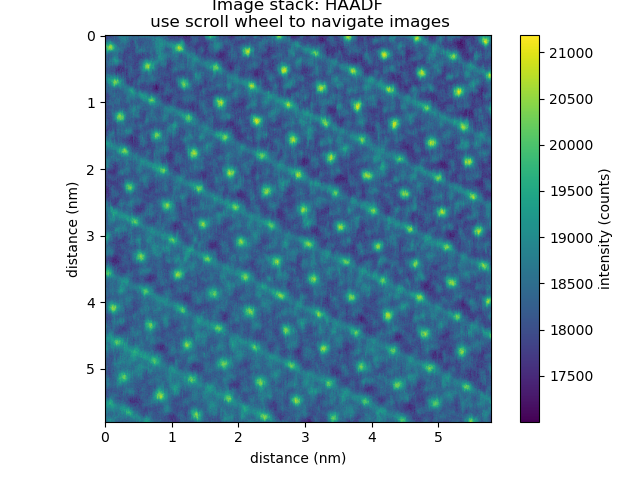

In [23]:
dataset = fileWidget.selected_dataset
view = dataset.plot()
print(dataset)
dataset

### Rigid Registration and Atom Finding
Select the Image stack

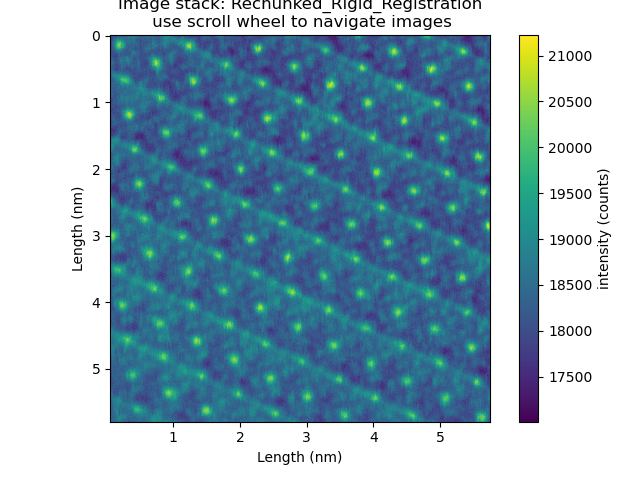

In [ ]:
rigid_registered = pyTEMlib.image_tools.rigid_registration(dataset[2:45], normalization='phase')
v = rigid_registered.plot()

In [29]:
dataset.view_metadata()

experiment :
	detector : HAADF
	acceleration_voltage : 200000.0
	microscope : Titan
	start_date_time : 1671049994
	collection_angle : 0.028128613800167915
	convergence_angle : 0.03
	probe_mode : convergent
	stage :
		holder : 
		position :
			x : -0.0004466754300000001
			y : 0.00040775331000000013
			z : 2.8562227797646867e-05
		tilt :
			alpha : -0.46595968899999995
			beta : 0.2955422569036484
	instrument : Spectra4018
	current : 5.970638270455995e-11
	pixel_time : 5e-05
	exposure_time : 14.0288
	sample : AlCe
	sample_id : Matt-1
	collection_angle_end : 0.17011625824861207
filename : C:\Users\gduscher\OneDrive - University of Tennessee\google_drive\2022 Experiments\Spectra\20221214\AlCe-200kV\SI HAADF 1533.emd


Visualize Drift

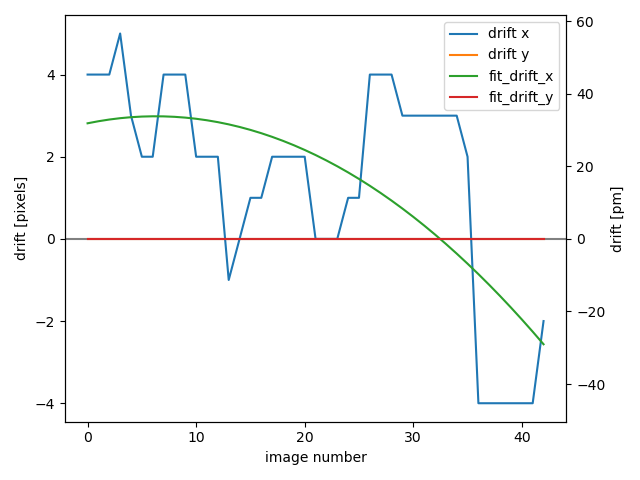

In [28]:
drift = rigid_registered.metadata['analysis']['rigid_registration']['drift']
polynom_degree = 2 # 1 is linear fit, 2 is parabolic fit, ...

x = np.linspace(0,drift.shape[0]-1,drift.shape[0])

line_fit_x = np.polyfit(x, drift[:,0], polynom_degree)
poly_x = np.poly1d(line_fit_x)
line_fit_y = np.polyfit(x, drift[:,1], polynom_degree)
poly_y = np.poly1d(line_fit_y)

plt.figure()
plt.axhline(color = 'gray')
plt.plot(x, drift[:,0], label = 'drift x')
plt.plot(x, drift[:,1], label = 'drift y')
plt.plot(x, poly_x(x),  label = 'fit_drift_x')
plt.plot(x, poly_y(x),  label = 'fit_drift_y')

plt.legend();
ax_pixels = plt.gca()
ax_pixels.step(1, 1)

scaleX = (rigid_registered.x[1]-rigid_registered.x[0])*1000.  #in pm

ax_pm = ax_pixels.twinx()
x_1, x_2 = ax_pixels.get_ylim()

ax_pm.set_ylim(x_1*scaleX, x_2*scaleX)

ax_pixels.set_ylabel('drift [pixels]')
ax_pm.set_ylabel('drift [pm]')
ax_pixels.set_xlabel('image number');
plt.tight_layout()

In [ ]:
### Does not work for spectrum images
# 
start = np.searchsorted(spectrum.energy_scale.values, 100)
energy_scale = spectrum.energy_scale.values[start:]
detector_Efficiency= pyTEMlib.eds_tools.detector_response(spectrum)  # tags, spectrum.energy_scale.values[start:])
if 'start_energy' not in spectrum.metadata['EDS']['detector']:
    spectrum.metadata['EDS']['detector']['start_energy'] = 120
spectrum[:np.searchsorted(spectrum.energy_scale.values,spectrum.metadata['EDS']['detector']['start_energy'])] = 0.
spectrum.metadata['EDS']['detector']['detector_efficiency']  = detector_Efficiency

ValueError: operands could not be broadcast together with shapes (183,) (1948,) (183,) 

## Find Elements 

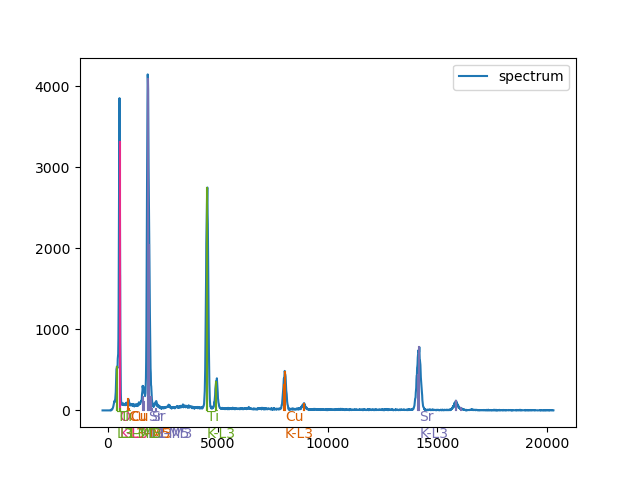

In [21]:
# --------Input -----------
minimum_number_of_peaks = 10
# --------------------------

pyTEMlib.eds_tools.get_elements(spectrum, minimum_number_of_peaks, verbose=False)

plt.figure()
plt.plot(spectrum.energy_scale,spectrum, label = 'spectrum')
pyTEMlib.eds_tools.plot_lines(spectrum.metadata['EDS'], plt.gca())
plt.legend()


## Quantify

### Fit spectrum

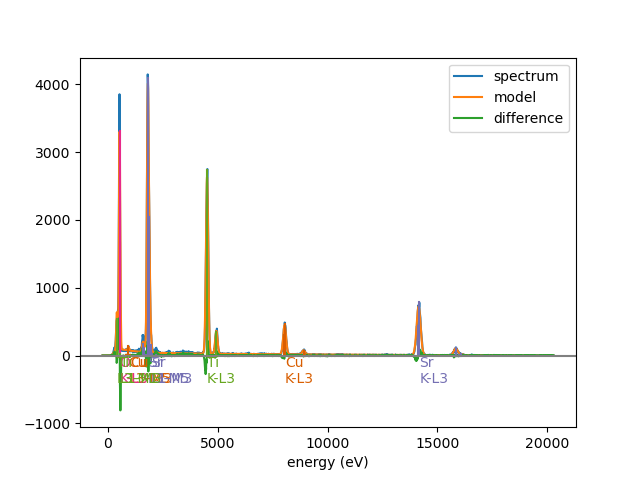

In [27]:
peaks, pp = pyTEMlib.eds_tools.fit_model(spectrum, use_detector_efficiency=True)
model = pyTEMlib.eds_tools.get_model(spectrum)

plt.figure()
plt.plot(spectrum.energy_scale, spectrum, label='spectrum')
plt.plot(spectrum.energy_scale, model, label='model')
plt.plot(spectrum.energy_scale, spectrum-model, label='difference')
plt.xlabel('energy (eV)')
pyTEMlib.eds_tools.plot_lines(spectrum.metadata['EDS'], plt.gca())
plt.axhline(y=0, xmin=0, xmax=1, color='gray')
plt.legend()

### Quantify Spectrum
first with Bote-Salvat cross section
using dictionaries calculated with [emtables package](https://github.com/adriente/emtables/blob/main/).

In [40]:
pyTEMlib.eds_tools.quantify_eds(spectrum, mask =['Cu'])

using cross sections for quantification
Sr: 20.57 at% 45.29 wt%
O : 51.02 at% 20.51 wt%
Ti: 28.42 at% 34.20 wt%


then with k-factor dictionary

In [42]:
q_dict = pyTEMlib.eds_tools.load_k_factors()
tags = pyTEMlib.eds_tools.quantify_eds(spectrum, q_dict, mask = ['Cu'])

using k-factors for quantification
Sr: 21.87 at% 49.34 wt%
O : 55.62 at% 22.91 wt%
Ti: 22.51 at% 27.74 wt%
excluded from quantification  ['Cu']


### Absorption Correction
Lower energy lines will be more affected than higher x-ray lines.

At thin sample location (<50nm) absorption is not significant.

In [1]:
# ------ Input ----------
thickness_in_nm = 90
# -----------------------
pyTEMlib.eds_tools.apply_absorption_correction(spectrum, thickness_in_nm)
for key, value in spectrum.metadata['EDS']['GUI'].items():
    if 'corrected-atom%' in value:
        print(f"Element: {key}, Corrected Atom%: {value['corrected-atom%']:.2f}, Corrected Weight%: {value['corrected-weight%']:.2f}")

NameError: name 'pyTEMlib' is not defined

## Summary
The spectrum is modeled completely with background and characteristic peak-families.

Either 
- k-factors in a file (here from Spectra300) or
- Bothe-Salvat cross-sections
 
are used for quantification.

## Appendix
### Background
The determined background used for the model-based quantification is based on the detector effciency.

Note:

The detector efficiency is also used for the quantification model.
